In [1]:
# %matplotlib
# %matplotlib inline
import numpy
import sys
import matplotlib.pyplot as plt
import time
sys.path.insert(1, '../../../../')
import gillespy2
from gillespy2 import NumPySSASolver , TauLeapingSolver, TauHybridSolver

In [2]:
class SimpleHybridModel(gillespy2.Model):
     def __init__(self, parameter_values=None, init_v=1):
            #initialize Model
            gillespy2.Model.__init__(self, name="Simple_Hybrid_Model")

            
            #Species
            A = gillespy2.Species(name='A', initial_value=50)
            V = gillespy2.Species(name='V', initial_value=init_v)

            self.add_species([A, V])
            
            #parameters
            rate1 = gillespy2.Parameter(name='rate1', expression= 20.0)
            rate2 = gillespy2.Parameter(name='rate2', expression= 10.0)
#             rate_rule1 = gillespy2.RateRule(V, "cos(t)")
            self.add_parameter([rate1, rate2])
#             self.add_rate_rule(rate_rule1)
            
            #reactions
            r1 = gillespy2.Reaction(name="r1",reactants={}, products={A:1},
                   propensity_function="rate1 * V")
            
            r2 = gillespy2.Reaction(name="r2",reactants={A:1}, products={},
                    rate=rate2)
            
            self.add_reaction([r1,r2])
            self.timespan(numpy.linspace(0,100, 101))

In [3]:
v_range = range(1, 1500, 5)
def run_test(solver, v_range):
    model = SimpleHybridModel()
    precompSolver = model.get_best_solver_algo(solver)(model, variable = True)
    run_data = []
    for n in v_range:
        time_start = time.perf_counter()
        model.run(solver=precompSolver, variables = {"V":n})
        time_end = time.perf_counter()
        run_data.append(time_end-time_start)
    return run_data

In [4]:
timing_data = {}
%time timing_data['SSA'] = run_test("SSA", v_range)
%time timing_data['tau_leaping'] = run_test("Tau-Leaping", v_range)
%time timing_data['hybrid_tau'] = run_test("Tau-Hybrid", v_range)
print(timing_data)

Wall time: 1min 49s
Wall time: 44 s
Wall time: 2min 2s
{'SSA': [0.03174890000000019, 0.021264599999999412, 0.02403880000000047, 0.026753900000000108, 0.028174599999999828, 0.032356400000000285, 0.03616539999999979, 0.03585250000000073, 0.03860660000000138, 0.04402189999999884, 0.044853700000000885, 0.046722499999999556, 0.05017659999999857, 0.05234509999999837, 0.056347199999999376, 0.058314700000000386, 0.05932340000000025, 0.05978449999999924, 0.06124619999999936, 0.06324880000000022, 0.06572400000000123, 0.06708300000000023, 0.06908890000000056, 0.0721866999999996, 0.07384039999999992, 0.07508170000000014, 0.08160140000000027, 0.08643, 0.08935790000000132, 0.09671610000000008, 0.09576269999999987, 0.09530990000000017, 0.09861569999999986, 0.09828080000000128, 0.098691800000001, 0.10857289999999864, 0.1035105000000005, 0.10314689999999871, 0.11513919999999978, 0.11372590000000038, 0.11463050000000052, 0.12531530000000046, 0.12561539999999916, 0.1252267000000007, 0.12991060000000054, 

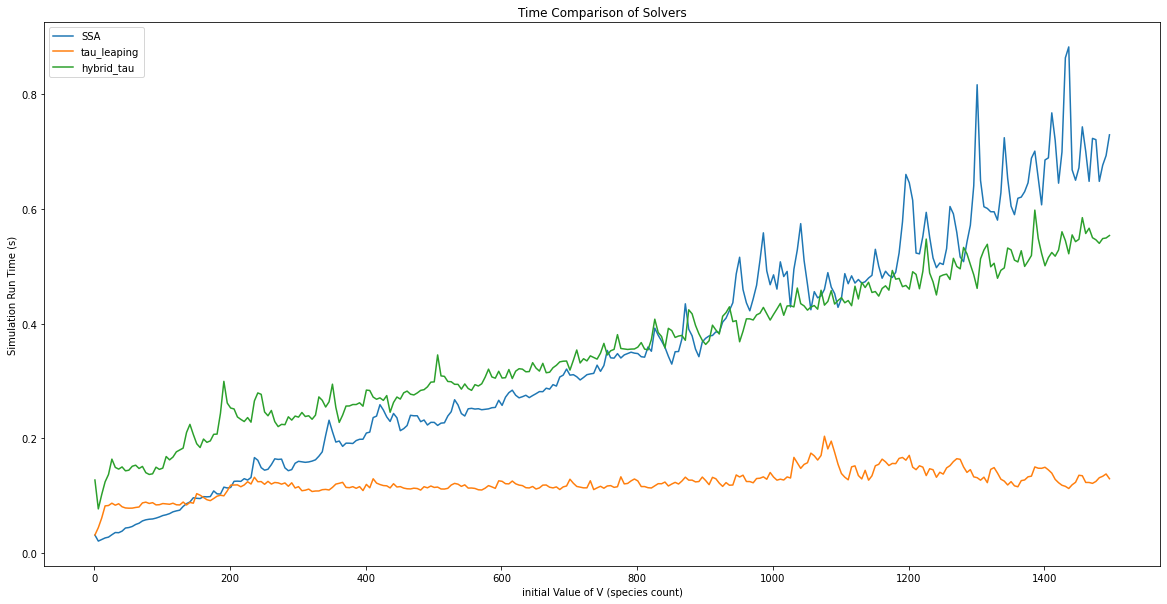

In [5]:
plt.figure(figsize=(20,10))
plt.title("Time Comparison of Solvers")
plt.xlabel("initial Value of V (species count)")
plt.ylabel("Simulation Run Time (s)")
plt.plot(v_range, timing_data['SSA'], label='SSA')
plt.plot(v_range, timing_data['tau_leaping'], label='tau_leaping')
plt.plot(v_range, timing_data['hybrid_tau'], label='hybrid_tau')
plt.legend(loc='best')
plt.savefig("TimeComparisonOfSolvers.pdf")